**Experimento con LeNet sobre MNIST**

**LeNet (1998):** $\;$ CNN de Yann LeCun para MNIST

<div align="center">
<table><tr>
<td style="border: none;"><img src="https://github.com/AlfonsJ/2024_01_31_RFA2324/blob/main/P03%20Redes%20neuronales%20profundas/T14%20Redes%20neuronales%20para%20im%C3%A1genes/14.3%20Arquitecturas%20comunes%20para%20clasificaci%C3%B3n%20de%20im%C3%A1genes/LeNet.png?raw=1" width=300/></td>
<td style="border: none;"><img src="https://github.com/AlfonsJ/2024_01_31_RFA2324/blob/main/P03%20Redes%20neuronales%20profundas/T14%20Redes%20neuronales%20para%20im%C3%A1genes/14.3%20Arquitecturas%20comunes%20para%20clasificaci%C3%B3n%20de%20im%C3%A1genes/Figure_14.15.png?raw=1" width=800/></td>
</tr></table>
</div>

**Lectura del corpus mnist, partición train, test y normalización**

In [25]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

training set (60000, 28, 28)
test set (10000, 28, 28)


**Optimización con conjunto de validación**

Hacemos la partición entrenamiento/validación (80%/20%)

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print('training set', x_train.shape)
print('val set', x_val.shape)

training set (48000, 28, 28)
val set (12000, 28, 28)


**Construimos la red secuencial siguiendo la estructura LeNet**

In [27]:
M = keras.Sequential()
M.add(keras.layers.Conv2D(filters=6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1)))
M.add(keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))
M.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='tanh'))
M.add(keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))
M.add(keras.layers.Flatten())
M.add(keras.layers.Dense(units=120, activation='tanh'))
M.add(keras.layers.Dense(units=84, activation='tanh'))
M.add(keras.layers.Dense(units=10, activation = 'softmax'))
M.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_6 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_7 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

**Generamos una imagen con la topología del modelo**

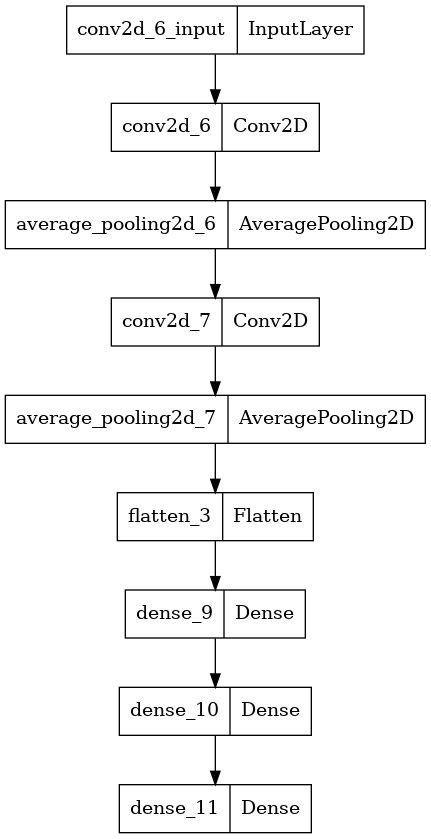

In [28]:
keras.utils.plot_model(M, to_file="LeNet.png")

**Compilamos el modelo**

Se han de definir los siguientes parámetros:

    1. Función de pérdida. Al ser un problema de clasificación emplearemos la categorical_crossentropy
    2. Optimizador. Como ejemplo aplicaremos descenso por gradiente estocástico SGD
    3. Indicar una métrica asociada a la calidad del modelo. En este caso la tasa de acierto accuracy

In [29]:
from keras.optimizers import SGD
sgd=SGD(learning_rate=0.1, momentum=0.9)
M.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

**Entrenamiento del modelo**

Se han de definir los siguientes parámetros:

1. Tamaño del batch
2. Número de épocas

Durante el entrenamiento el modelo se evalúa con los datos de validación. Se genera un history que permite representar gráficamente la evolución del modelo durante el entrenamiento.

In [30]:
batch_size=128
epochs=15

H = M.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/15
375/375 [==============================] - 8s 21ms/step - loss: 0.2427 - accuracy: 0.9251 - val_loss: 0.1033 - val_accuracy: 0.9693
Epoch 2/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0789 - accuracy: 0.9756 - val_loss: 0.0670 - val_accuracy: 0.9799
Epoch 3/15
375/375 [==============================] - 6s 17ms/step - loss: 0.0524 - accuracy: 0.9834 - val_loss: 0.0626 - val_accuracy: 0.9823
Epoch 4/15
375/375 [==============================] - 6s 17ms/step - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.0610 - val_accuracy: 0.9829
Epoch 5/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0497 - val_accuracy: 0.9866
Epoch 6/15
375/375 [==============================] - 7s 18ms/step - loss: 0.0240 - accuracy: 0.9930 - val_loss: 0.0540 - val_accuracy: 0.9851
Epoch 7/15
375/375 [==============================] - 8s 20ms/step - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0565 - val_accuracy: 0.9847

**Representamos gráficamente la evolución del entrenamiento (loss y accuracy)**

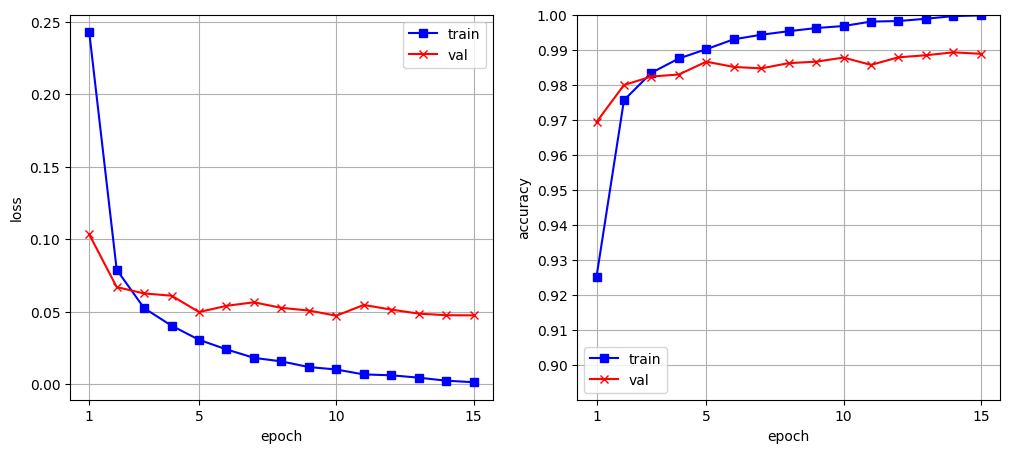

In [31]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
xx = np.arange(1, len(H.history['loss'])+1)
xticks = np.concatenate((np.array([1]), np.arange(5, len(H.history['loss'])+1, 5)))
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss');
ax.set_xticks(xticks)
ax.plot(xx, H.history['loss'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_loss'], color='r', marker='x', label='val'); ax.legend()
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy')
ax.set_xticks(xticks); ax.set_yticks(np.arange(.9, 1.01, .01)); ax.set_ylim([.89, 1.])
ax.plot(xx, H.history['accuracy'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_accuracy'], color='r', marker='x', label='val'); ax.legend();

**Guardado del modelo**

In [32]:
M.save("LeNet.keras")

**Carga y evaluación del modelo**

In [33]:
from keras.models import load_model
M = load_model("LeNet.keras")

score = M.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0367586724460125
Test accuracy: 0.9894000291824341



**Model checkpoint**

Los model checkpoint permiten almacenar diferentes instancias del modelo durante el entrenamiento con el fin de poder recuperarlo en caso de fallo del mismo o de recuperar el mejor modelo obtenido.


In [ ]:
batch_size=128
epochs=15

checkpoint = keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

H = M.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint]) 